<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/bai_tap_phan_tich_anova_1_chieu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hãy sử dụng các tập dữ liệu sau và tiến hành phân tích ANOVA 1 chiều

- [Excavation Depth and Archaeology](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan01.html)
- [Apple Orchard Experiment](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan02.html)
- [Red Dye Number 40](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan03.html)
- [Business Startup Costs](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan04.html)
- [Weights of Football Players](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan05.html)

In [81]:
#Code here
#ĐỌc dữ liệu
excel_file = 'owan01.xls'
Du_lieu1 = pd.read_excel(excel_file)

Du_lieu1.drop('X1', axis= 1, inplace= True)
Du_lieu1
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'high']]
low = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'low']]
placebo = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'placebo']]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats
#from scipy.stats import f_oneway


In [73]:
#đọc dữ liệu
Du_lieu1 = pd.read_csv("owan01.csv")
df.head()

,X1,X2,X3,X4
0,93,85.0,100.0,96.0
1,120,45.0,75.0,58.0
2,65,80.0,65.0,95.0
3,105,28.0,40.0,90.0
4,115,75.0,73.0,65.0


In [74]:
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'high']]
low = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'low']]
placebo = Du_lieu1['X2'][Du_lieu1['X3'][Du_lieu1['X4'] == 'placebo']]

In [76]:
X2 = Du_lieu1['X2']
X3 = Du_lieu1['X3']
X4 = Du_lieu1['X4']

In [92]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova')
        print('-'*50)

In [78]:
#Đầu tiên ta tiến hành kiểm tra các giả định
# Ta thấy các giả định đều độc lập với nhau
#"Giả định này được kiểm tra khi nghiên cứu được thiết kế.
#Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau,
#tức là một cá nhân chỉ có thể thuộc về một nhóm.
#Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). 
#Trong ví dụ này, điều kiện này được đáp ứng"

In [79]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X2, X3, X4)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=1.800618441913396, pvalue=0.4064439593170538)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


In [63]:
# tiếp đến ta Kiểm định bộ dữ liệu (variable, feature) có tuân theo luận phân phối chuẩn hay không?
# Sử dụng histogram và qq plot để vẽ biểu đồ kiểm tra phân phối chuẩn

In [93]:
X2 = thongke(X2)
X2.hist()
X2.qq()

StatisticsError: ignored

In [65]:
X3 = thongke(X3)
X3.hist()
X3.qq()

StatisticsError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


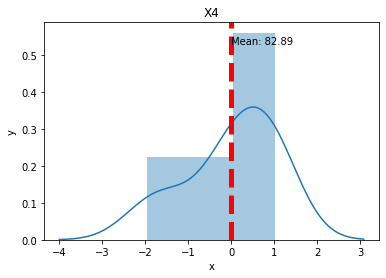

RuntimeError: ignored

In [66]:
X4 = thongke(X4)
X4.hist()
X4.qq()

In [ ]:
# tiếp đến ta sẽ kiểm tra phân phối chuẩn thông qua các kỹ thuật thống kê (khá chính xác).
# Sử dụng kiểm định Shapiro-Wilk

In [67]:
X2.shapiro()

AttributeError: ignored

In [68]:
X3.shapiro()

AttributeError: ignored

In [32]:
X4.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [59]:
#Sau khi kiểm tra các giả định: ta kết luận:

#Các mẫu độc lập với nhau
#Các mẫu có cùng phương sai
#Các mẫu đều tuân theo phân phối chuẩn

In [60]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu1['X2'], Du_lieu1['X3'],Du_lieu1['X4'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=nan, p=nan
Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.
--------------------------------------------------


In [83]:
# Tương tự như vậy ta sẽ sử dụng dữ liệu thứ 2
excel_file = 'owan02.xls'
Du_lieu2 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'high']]]]
low = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'low']]]]
placebo = Du_lieu2['X1'][Du_lieu2['X2'][Du_lieu2['X3'][Du_lieu2['X4'][Du_lieu2['X5'] == 'placebo']]]]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [84]:
X2_1 = Du_lieu2['X1']
X2_2 = Du_lieu2['X2']
X2_3 = Du_lieu2['X3']
X2_4 = Du_lieu2['X4']
X2_5 = Du_lieu2['X5']

In [85]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X2_1, X2_2, X2_3, X2_4, X2_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=1.505379741017298, pvalue=0.825688088344803)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


In [94]:
X2_1 = thongke(X2_1)
X2_1.hist()
X2_1.qq()

StatisticsError: ignored

In [87]:
X2_2 = thongke(X2_2)
X2_2.hist()
X2_2.qq()

StatisticsError: ignored

In [88]:
X2_3 = thongke(X2_3)
X2_3.hist()
X2_3.qq()

StatisticsError: ignored

In [89]:
X2_4 = thongke(X2_4)
X2_4.hist()
X2_4.qq()

StatisticsError: ignored

In [90]:
X2_5 = thongke(X2_5)
X2_5.hist()
X2_5.qq()

StatisticsError: ignored

In [91]:
X2_1.shapiro()
X2_2.shapiro()
X2_3.shapiro()
X2_4.shapiro()
X2_5.shapiro()

AttributeError: ignored

In [102]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu2['X1'], Du_lieu2['X2'], Du_lieu2['X3'],Du_lieu2['X4'], Du_lieu2['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=1.31422, p=0.28382584
Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau
--------------------------------------------------


In [103]:
#tiếp đến ta sử dụng dữ liệu 3
excel_file = 'owan03.xls'
Du_lieu3 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4'] == 'high']]]
low =  Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4'] == 'low']]]
placebo =  Du_lieu3['X1'][Du_lieu3['X2'][Du_lieu3['X3'][Du_lieu3['X4']== 'placebo']]]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [104]:
X3_1 = Du_lieu3['X1']
X3_2 = Du_lieu3['X2']
X3_3 = Du_lieu3['X3']
X3_4 = Du_lieu3['X4']

In [105]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X3_1, X3_2, X3_3, X3_4)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=12.022305190389242, pvalue=0.007307141609688417)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


In [106]:
#tiếp đến ta sử dụng dữ liệu 4
excel_file = 'owan04.xls'
Du_lieu4 = pd.read_excel(excel_file)
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'high']]]]
low = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'low']]]]
placebo = Du_lieu4['X1'][Du_lieu4['X2'][Du_lieu4['X3'][Du_lieu4['X4'][Du_lieu4['X5'] == 'placebo']]]]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [107]:
X4_1 = Du_lieu4['X1']
X4_2 = Du_lieu4['X2']
X4_3 = Du_lieu4['X3']
X4_4 = Du_lieu4['X4']
X4_5 = Du_lieu4['X5']

In [108]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(X4_1, X4_2, X4_3, X4_4, X4_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=2.149120392490446, pvalue=0.7083542065575461)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


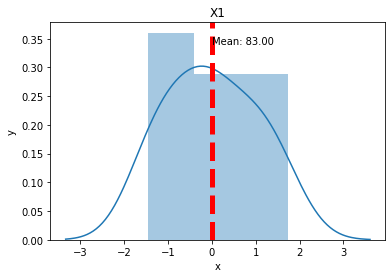

RuntimeError: ignored

In [109]:
X4_1 = thongke(X4_1)
X4_1.hist()
X4_1.qq()

In [110]:
X4_2 = thongke(X4_2)
X4_2.hist()
X4_2.qq()

StatisticsError: ignored

In [111]:
X4_3= thongke(X4_3)
X4_3.hist()
X4_3.qq()

StatisticsError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


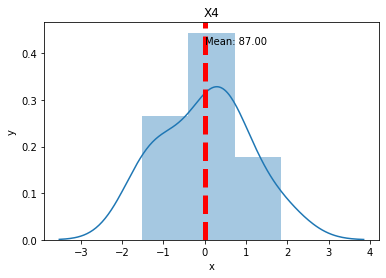

RuntimeError: ignored

In [112]:
X4_4= thongke(X4_4)
X4_4.hist()
X4_4.qq()

In [113]:
X4_5= thongke(X4_5)
X4_5.hist()
X4_5.qq()

StatisticsError: ignored

In [114]:
X4_1.shapiro()
X4_2.shapiro()
X4_3.shapiro()
X4_4.shapiro()
X4_5.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


AttributeError: ignored

In [115]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu4['X1'], Du_lieu4['X2'], Du_lieu4['X3'],Du_lieu4['X4'], Du_lieu4['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=nan, p=nan
Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.
--------------------------------------------------


In [116]:
#ta tiếp tục sử dụng dữ liệu 5
excel_file = 'owan05.xls'
Du_lieu5 = pd.read_excel(excel_file)
Du_lieu5.drop('X1', axis= 1, inplace= True)
Du_lieu5
#Chuyển đổi df thành dạng phù hợp để phân tích ANOVA một chiều theo gói scipy.stats
high = low =  placebo = []
high = [Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5'] == 'high']]]]
low = [Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5']  == 'low']]]]
placebo =[Du_lieu5['X2'][Du_lieu5['X3'][Du_lieu5['X4'][Du_lieu5['X5']  == 'placebo']]]]

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [117]:
X5_2 = Du_lieu5['X2']
X5_3 = Du_lieu5['X3']
X5_4 = Du_lieu5['X4']
X5_5 = Du_lieu5['X5']

In [118]:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett( X5_2, X5_3, X5_4, X5_5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=0.04756469192474709, pvalue=0.9972800736661933)
Phương sai các nhóm  bằng nhau.
--------------------------------------------------


In [119]:
X5_2= thongke(X5_2)
X5_2.hist()
X5_2.qq()

StatisticsError: ignored

In [120]:
X5_3= thongke(X5_3)
X5_3.hist()
X5_3.qq()

StatisticsError: ignored

In [122]:
X5_4= thongke(X5_4)
X5_4.hist()
X5_4.qq()

StatisticsError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


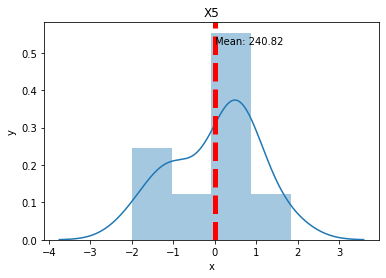

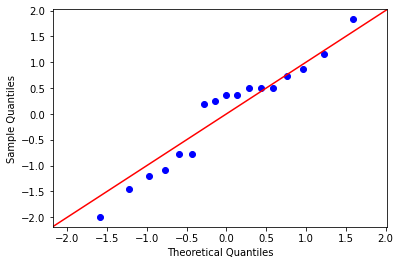

            X5
0.25 -0.778175
0.50  0.374809
0.75  0.496175
--------------------------------------------------


In [123]:
X5_5= thongke(X5_5)
X5_5.hist()
X5_5.qq()

In [126]:
X5_2.shapiro()
X5_3.shapiro()
X5_4.shapiro()


AttributeError: ignored

In [127]:

X5_5.shapiro()

Kiểm định Shapori:
stat=0.942, p=0.338
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [128]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway( Du_lieu5['X2'], Du_lieu5['X3'],Du_lieu5['X4'], Du_lieu5['X5'])
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=1.98929, p=0.12444104
Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau
--------------------------------------------------
